# Problem

Predict whether income exceeds $50K/yr based on census data.

# About the dataset

age: continuous

workclass: categorical (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)

fnlwgt: continuous

education: categorical (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)

education-num: continuous

marital-status: categorical (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)

occupation: categorical (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)

relationship: categorical (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)

race: categorical (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)

sex: categorical (Female, Male)

capital-gain: continuous

capital-loss: continuous

hours-per-week: continuous

native-country: categorical (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

income: target variable (>50K, <=50K)

# Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing dataset

In [2]:
raw_data = pd.read_csv('.../adult/adult.data', index_col=False, \
                       names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation', 'relationship', \
                              'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'], \
                       sep=' *, *', na_values='?', engine='python')
raw_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# About the dataset

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
raw_data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Data preprocessing

### Checking for missing values

In [5]:
data = raw_data.copy()

In [6]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [7]:
data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [8]:
data.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
data['native-country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

### Filling missing values

In [10]:
data['occupation'] = data['occupation'].fillna('Other-service')
data['workclass'] = data['workclass'].fillna('Private')
data['native-country'] = data['native-country'].fillna('United-States')

In [11]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Checking for similar and/or irrelevant attributes (previously known)

In [12]:
l1 = list(data.education.unique())
l1

['Bachelors',
 'HS-grad',
 '11th',
 'Masters',
 '9th',
 'Some-college',
 'Assoc-acdm',
 'Assoc-voc',
 '7th-8th',
 'Doctorate',
 'Prof-school',
 '5th-6th',
 '10th',
 '1st-4th',
 'Preschool',
 '12th']

In [13]:
l2 = list(data['education-num'].unique())
l2

[13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6, 2, 1, 8]

In [14]:
flag = 0
for i in range(len(data)):
    ind = l1.index(data.loc[i,'education'])
    if data.loc[i,'education-num'] != l2[ind]:
        flag = 1
flag

0

In [15]:
data = data.drop(['fnlwgt','education'], axis=1)
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Analyzing categorical attributes

In [16]:
cat_atts = data.select_dtypes(include=['object'])
cat_atts.columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'income'],
      dtype='object')

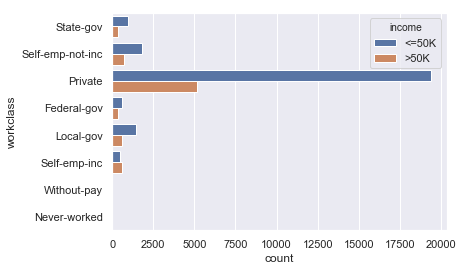

In [17]:
sns.countplot(y='workclass', hue='income', data = cat_atts)

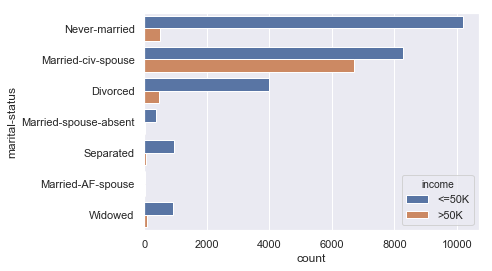

In [18]:
sns.countplot(y='marital-status', hue='income', data = cat_atts)

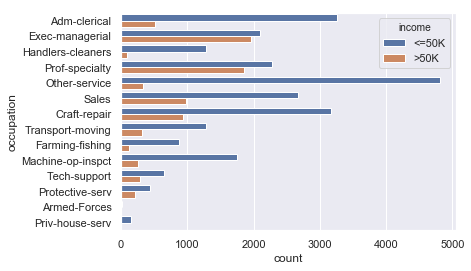

In [19]:
sns.countplot(y='occupation', hue='income', data = cat_atts)

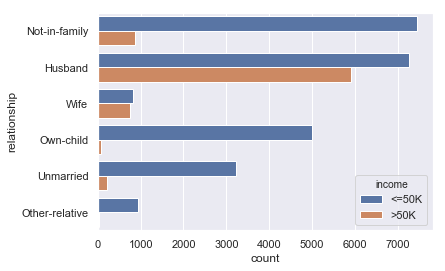

In [20]:
sns.countplot(y='relationship', hue='income', data = cat_atts)

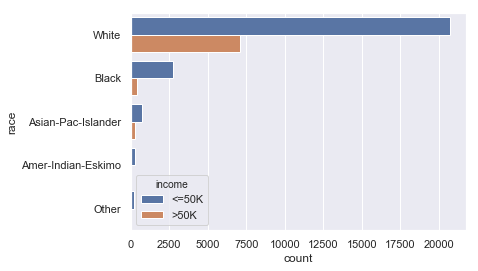

In [21]:
sns.countplot(y='race', hue='income', data = cat_atts)

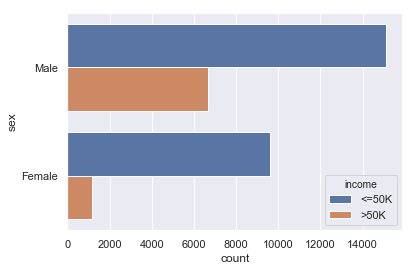

In [22]:
sns.countplot(y='sex', hue='income', data = cat_atts)

In [23]:
data1 = data.copy()   # creating a savepoint

### Creating dummy variables

In [24]:
data_dummies = pd.get_dummies(data1[['workclass','marital-status','occupation','relationship','race','sex','native-country']], \
                              drop_first=True)

In [25]:
data_dummies.columns

Index(['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_As

In [26]:
# Dropping columns for which dummy variables have been created

data1 = data1.drop(['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], axis=1)
data1.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K


In [27]:
data1['income'] = data1['income'].replace({'<=50K':0, '>50K':1})
data1.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0


### Analyzing numerical attributes

In [28]:
data1[['age','education-num','capital-gain','capital-loss','hours-per-week']].describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [29]:
data1.groupby('income').mean()

,age,education-num,capital-gain,capital-loss,hours-per-week
income,,,,,
0,36.783738,9.595065,148.752468,53.142921,38.840210
1,44.249841,11.611657,4006.142456,195.001530,45.473026


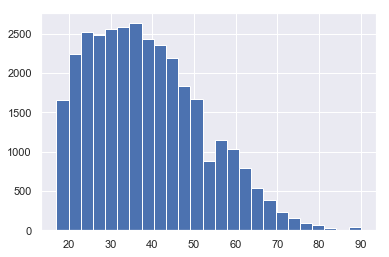

In [30]:
data1.age.hist(bins=25)

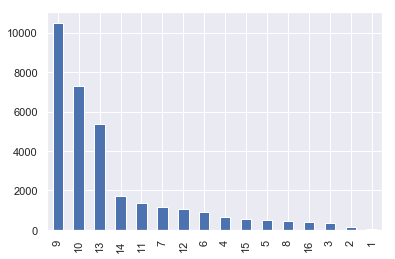

In [31]:
data1['education-num'].value_counts().plot.bar()

In [32]:
len(data1[data1['capital-gain'] < 20000])

32308

In [33]:
data1[(data1['capital-gain'] <20000) & (data1['capital-gain'] != 0)]['capital-gain'].describe()

count     2459.000000
mean      6851.653924
std       4412.893751
min        114.000000
25%       3325.000000
50%       5178.000000
75%       7688.000000
max      18481.000000
Name: capital-gain, dtype: float64

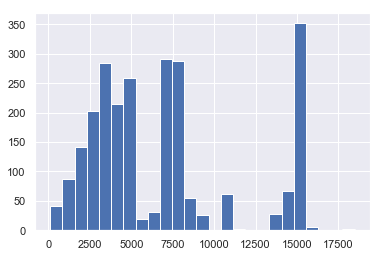

In [34]:
data1[(data1['capital-gain'] <20000) & (data1['capital-gain'] != 0)]['capital-gain'].hist(bins=25)

In [35]:
len(data1[data1['capital-loss'] != 0])

1519

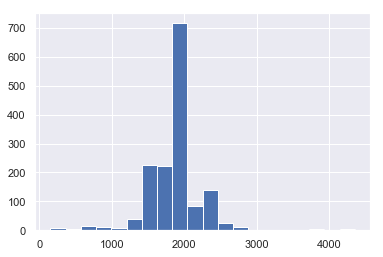

In [36]:
data1[data1['capital-loss'] != 0]['capital-loss'].hist(bins=20)

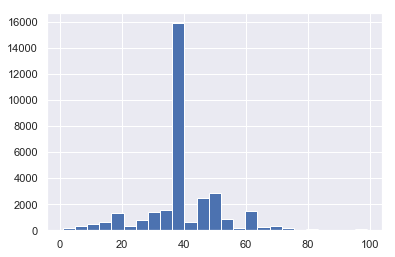

In [37]:
data1['hours-per-week'].hist(bins=25)

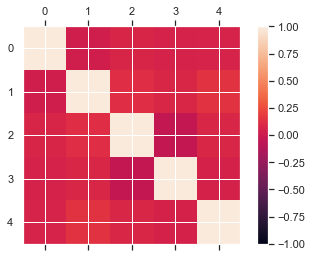

In [38]:
correlations = data1[['age','education-num','capital-gain','capital-loss','hours-per-week']].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

### Scaling the numerical attributes

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1[['age','education-num','capital-gain','capital-loss','hours-per-week']] \
        = scaler.fit_transform(data1[['age','education-num','capital-gain','capital-loss','hours-per-week']])
data1.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,0
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,0
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,0
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,0
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,0


### Reducing no. of dummy variables

In [40]:
data_dummies.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
dummy_data = np.array(data_dummies)
dummy_data = np.array(dummy_data) - np.mean(dummy_data, axis=0)
dummy_data.shape

(32561, 76)

In [42]:
# Creating new features using all existing features, while preserving 95% of the variance

from sklearn.decomposition import PCA

pca = PCA(0.95)
dummies_pca = pca.fit_transform(dummy_data)
dummies_pca.shape

(32561, 25)

In [43]:
l1 = []
for i in range(dummies_pca.shape[1]):
    l1.append('Dummies_Prin_Comp_'+str(i+1))
data_dummies_pca = pd.DataFrame(dummies_pca, columns=l1)
data_dummies_pca.head()

,Dummies_Prin_Comp_1,Dummies_Prin_Comp_2,Dummies_Prin_Comp_3,Dummies_Prin_Comp_4,Dummies_Prin_Comp_5,Dummies_Prin_Comp_6,Dummies_Prin_Comp_7,Dummies_Prin_Comp_8,Dummies_Prin_Comp_9,Dummies_Prin_Comp_10,...,Dummies_Prin_Comp_16,Dummies_Prin_Comp_17,Dummies_Prin_Comp_18,Dummies_Prin_Comp_19,Dummies_Prin_Comp_20,Dummies_Prin_Comp_21,Dummies_Prin_Comp_22,Dummies_Prin_Comp_23,Dummies_Prin_Comp_24,Dummies_Prin_Comp_25
0,0.563070,0.489890,-1.103061,0.173908,0.193983,0.146069,-0.096762,-0.035009,0.044438,-0.082902,...,0.814877,0.160440,0.026730,-0.430762,-0.029225,-0.121352,-0.015172,0.157491,0.059121,-0.053910
1,-1.008753,0.509206,-0.400774,0.426407,-0.148453,0.031679,-0.782325,-0.363256,-0.122372,0.055097,...,-0.261709,-0.038647,0.001731,-0.096761,0.055827,-0.154013,-0.036477,-0.165625,-0.017886,-0.010670
2,0.238438,-0.010061,-0.482178,-0.706382,0.247731,0.011272,-0.034126,0.042804,-0.008301,-0.296063,...,-0.035446,0.809432,0.146589,0.204578,-0.054315,-0.331145,-0.031082,0.005344,0.013740,0.180094
3,-0.545077,-0.243308,0.600358,0.177127,1.109801,-0.200386,0.119260,-0.254008,0.041530,0.011868,...,-0.065059,0.838030,-0.034151,0.176794,-0.037297,-0.238466,-0.173933,-0.108265,-0.166829,0.001185
4,-0.257857,0.487948,1.250240,0.118290,0.657170,-0.239529,1.049644,-0.530819,-0.149283,0.608238,...,-0.093098,0.101658,-0.558998,-0.002390,-0.322575,-0.052002,0.044685,0.119124,0.429602,0.002728


### Joining the numerical and categorical attributes

In [44]:
data_final = pd.concat([data1,data_dummies_pca], axis=1)
data_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,Dummies_Prin_Comp_1,Dummies_Prin_Comp_2,Dummies_Prin_Comp_3,Dummies_Prin_Comp_4,...,Dummies_Prin_Comp_16,Dummies_Prin_Comp_17,Dummies_Prin_Comp_18,Dummies_Prin_Comp_19,Dummies_Prin_Comp_20,Dummies_Prin_Comp_21,Dummies_Prin_Comp_22,Dummies_Prin_Comp_23,Dummies_Prin_Comp_24,Dummies_Prin_Comp_25
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,0,0.563070,0.489890,-1.103061,0.173908,...,0.814877,0.160440,0.026730,-0.430762,-0.029225,-0.121352,-0.015172,0.157491,0.059121,-0.053910
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,0,-1.008753,0.509206,-0.400774,0.426407,...,-0.261709,-0.038647,0.001731,-0.096761,0.055827,-0.154013,-0.036477,-0.165625,-0.017886,-0.010670
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,0,0.238438,-0.010061,-0.482178,-0.706382,...,-0.035446,0.809432,0.146589,0.204578,-0.054315,-0.331145,-0.031082,0.005344,0.013740,0.180094
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,0,-0.545077,-0.243308,0.600358,0.177127,...,-0.065059,0.838030,-0.034151,0.176794,-0.037297,-0.238466,-0.173933,-0.108265,-0.166829,0.001185
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,0,-0.257857,0.487948,1.250240,0.118290,...,-0.093098,0.101658,-0.558998,-0.002390,-0.322575,-0.052002,0.044685,0.119124,0.429602,0.002728


### Checking for imbalanced dataset

In [45]:
data_final.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

### Splitting the train and test sets

In [46]:
X = data_final.drop('income', axis=1)
y = data_final['income']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26048, 30) (6513, 30) (26048,) (6513,)


### Balancing the train set

In [49]:
import imblearn
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=2)
X_train_balanced, y_train_balanced = adasyn.fit_sample(X_train,y_train)

In [50]:
print(X_train_balanced.shape, y_train_balanced.shape)

(38550, 30) (38550,)


In [51]:
np.bincount(y_train_balanced)

array([19694, 18856], dtype=int64)

# Data Modelling

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=3)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=3, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
y_pred = lr.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cnf_mt = confusion_matrix(y_test, y_pred)
cnf_mt

array([[4635,  391],
       [ 590,  897]], dtype=int64)

In [55]:
acc = accuracy_score(y_test, y_pred)
acc

0.8493781667434362

In [56]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.92      0.90      5026
          1       0.70      0.60      0.65      1487

avg / total       0.84      0.85      0.85      6513



In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

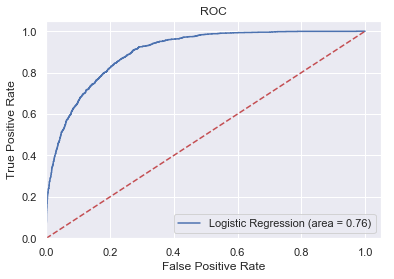

In [58]:
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### k-Nearest Neighbours

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
y_pred = knn.predict(X_test)

In [61]:
cnf_mt = confusion_matrix(y_test, y_pred)
cnf_mt

array([[4054,  972],
       [ 386, 1101]], dtype=int64)

In [62]:
acc = accuracy_score(y_test, y_pred)
acc

0.79149393520651

In [63]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.81      0.86      5026
          1       0.53      0.74      0.62      1487

avg / total       0.83      0.79      0.80      6513



In [64]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

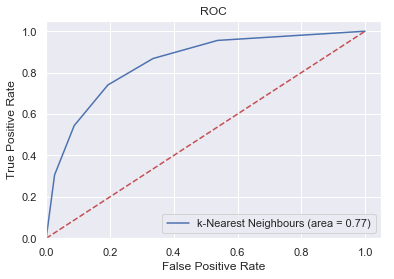

In [65]:
plt.plot(fpr, tpr, label='k-Nearest Neighbours (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=4)
rfc.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False)

In [67]:
y_pred = rfc.predict(X_test)

In [68]:
cnf_mt = confusion_matrix(y_test, y_pred)
cnf_mt

array([[4482,  544],
       [ 578,  909]], dtype=int64)

In [69]:
acc = accuracy_score(y_test, y_pred)
acc

0.8277291570704745

In [70]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.89      0.89      5026
          1       0.63      0.61      0.62      1487

avg / total       0.83      0.83      0.83      6513



In [71]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

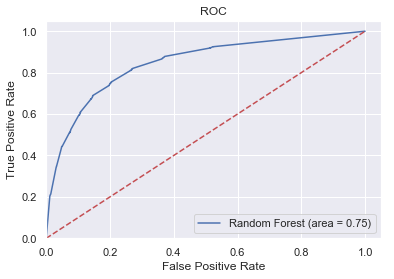

In [72]:
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Support Vector Machine

In [73]:
from sklearn.svm import SVC

svm_cl = SVC(kernel='linear', probability=True, random_state=5)
svm_cl.fit(X_train_balanced, y_train_balanced)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=5, shrinking=True, tol=0.001,
  verbose=False)

In [74]:
y_pred = svm_cl.predict(X_test)

In [75]:
cnf_mt = confusion_matrix(y_test, y_pred)
cnf_mt

array([[3274, 1752],
       [ 154, 1333]], dtype=int64)

In [76]:
acc = accuracy_score(y_test, y_pred)
acc

0.7073545217257792

In [77]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.65      0.77      5026
          1       0.43      0.90      0.58      1487

avg / total       0.84      0.71      0.73      6513



In [78]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, svm_cl.predict_proba(X_test)[:,1])

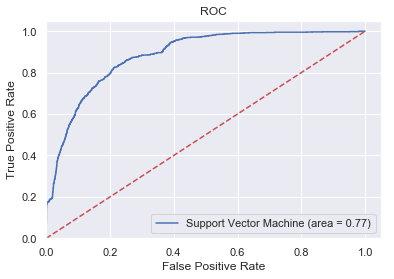

In [79]:
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()